In [1]:
import numpy as np
import pandas as pd

chord_list = '/home/sh/WCY/auto_propeller/resource4/1_model/BEM/DJI9443_chorddist.csv'
pitch_list = '/home/sh/WCY/auto_propeller/resource4/1_model/BEM/DJI9443_pitchdist.csv'

chord_df = pd.read_csv(chord_list)
pitch_df = pd.read_csv(pitch_list)

print(chord_df.head(),pitch_df.head())

        r/R       c/R
0  0.040620  0.120000
1  0.091114  0.173973
2  0.141608  0.216431
3  0.170000  0.239225
4  0.192101  0.253059         r/R  twist (deg)
0  0.000000      13.0000
1  0.050000      15.5000
2  0.076106      17.6022
3  0.099115      18.7175
4  0.123894      19.2751


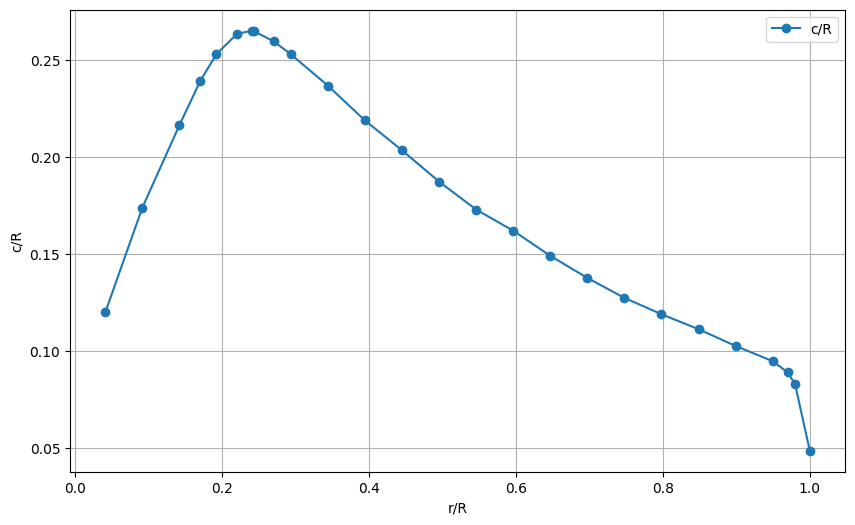

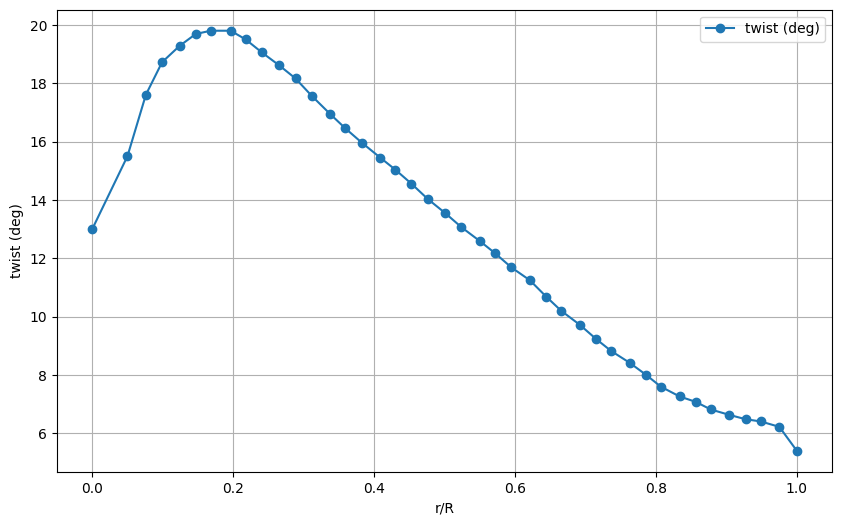

In [2]:
import matplotlib.pyplot as plt

chord_df.plot(x='r/R', y='c/R', marker='o', grid=True, figsize=(10, 6))
plt.xlabel('r/R')
plt.ylabel('c/R')
plt.show()

pitch_df.plot(x='r/R', y='twist (deg)', marker='o', grid=True, figsize=(10, 6))
plt.xlabel('r/R')
plt.ylabel('twist (deg)')
plt.show()

In [3]:
from scipy.interpolate import splprep, splev

def get_rangeinter(x, y, arg_points = [1,3], inter_range =[-0.1, 0.2] , internum = 26, num = 101, k = 4, s = 2):
    
    tck, u = splprep([x, y], k=k, s=s)
    x_new, y_new = splev(np.linspace(0, 1, internum), tck)
    
    list_x_new, list_y_new = [x_new], [y_new]

    k_values = np.linspace(inter_range[0], inter_range[1], num)
    for po in k_values:
        # 使用原始的 tck 创建一个新的控制点数组
        new_control_points = [np.copy(cp) for cp in tck[1]]
        for j in arg_points:
            new_control_points[1][j] += po
        
        new_tck = (tck[0], new_control_points, tck[2])
        x_new, y_new = splev(np.linspace(0, 1, internum), new_tck)
        list_x_new.append(x_new)
        list_y_new.append(y_new)

    return np.array(list_x_new), np.array(list_y_new)

num = 100
x = chord_df['r/R']
y = chord_df['c/R']

list_chordx, list_chordy = get_rangeinter(x,y)

print(list_chordx)
x = pitch_df['r/R']
y = pitch_df['twist (deg)']
list_pitchx, list_pitchy = get_rangeinter(x,y,[2,3,4], [-3, 5],len(y))

data = []
for i in range(num):
    for j in range(num):
        cur_chord_x    = list_chordx[i]
        cur_c_R        = list_chordy[i]
        cur_pitch_x    = list_pitchx[j]
        cur_twist      = list_pitchy[j]
        data.append([cur_chord_x, cur_c_R, cur_pitch_x, cur_twist])

df = pd.DataFrame(data, columns=['r/R(chord)', 'c/R','r/R(pitch)', 'twist (deg)'])
sample_2000 = df.sample(2000, random_state=1)

# 从 df 中移除这 2000 行，然后从剩余的中采样 200 行
sample_200 = df.drop(sample_2000.index).sample(200, random_state=1)

# 再次从 df 中移除采样的行，然后从剩余的中采样 20 行
sample_20 = df.drop(sample_2000.index).drop(sample_200.index).sample(20, random_state=1)
sample_10 = df.drop(sample_2000.index).drop(sample_200.index).drop(sample_20.index).sample(10, random_state=1)

# sample_10.to_csv('DJ_ListTest_ChordPitch.csv', index=False)
# sample_20.to_csv('DJ_ListHigh_ChordPitch.csv', index=False)
# sample_200.to_csv('DJ_ListMid_ChordPitch.csv', index=False)
# sample_2000.to_csv('DJ_ListBEM_ChordPitch.csv', index=False)
# df.to_csv('DJ_List_ChordPitch.csv', index=False)


[[0.03805239 0.0676741  0.0992482  ... 0.93368887 0.97263973 1.01110325]
 [0.03805239 0.0676741  0.0992482  ... 0.93368887 0.97263973 1.01110325]
 [0.03805239 0.0676741  0.0992482  ... 0.93368887 0.97263973 1.01110325]
 ...
 [0.03805239 0.0676741  0.0992482  ... 0.93368887 0.97263973 1.01110325]
 [0.03805239 0.0676741  0.0992482  ... 0.93368887 0.97263973 1.01110325]
 [0.03805239 0.0676741  0.0992482  ... 0.93368887 0.97263973 1.01110325]]


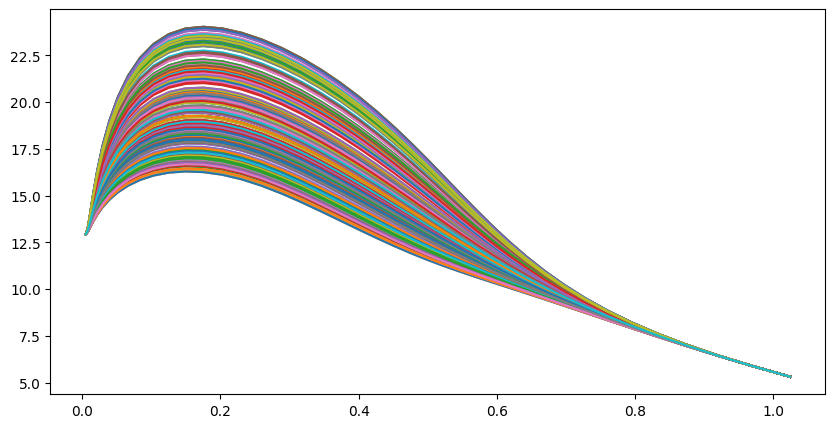

In [4]:
plt.figure(figsize=(10, 5))
for index, row in sample_200.iterrows():
    # 假设您想对每行数据绘制单独的曲线
    x = row['r/R(pitch)']  # 这是单个值
    y = row['twist (deg)']         # 这是单个值
    plt.plot(x, y)  # 假设每行只有一个点
plt.show()

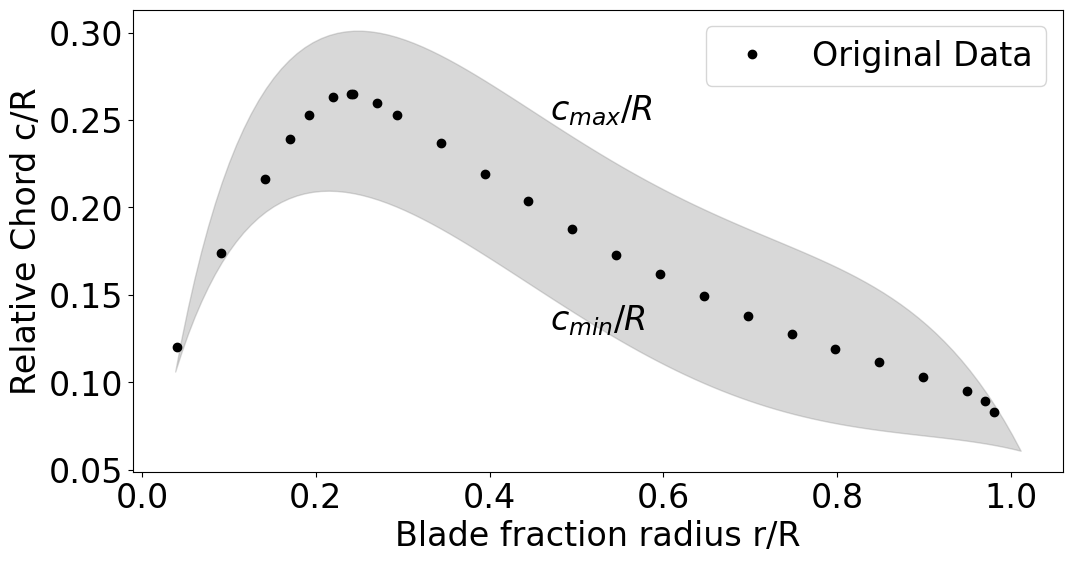

In [12]:
plt.rcParams['font.size'] = 24  # 可以调整这个值来设置字体大小

x = chord_df['r/R']
y = chord_df['c/R']

tck, u = splprep([x, y], k=4, s=2)  # s=0表示完全拟合，没有平滑

# 获取控制点
tck1 = tck.copy()
control_points  = tck1[1] 
control_points[1][1] = control_points[1][1] - 0.1
control_points[1][3] = control_points[1][3] - 0.1

# 为了展示拟合效果，使用splev生成B样条曲线的点
x_low, y_low = splev(np.linspace(0, 1,100), tck1)

# 获取控制点
tck2 = tck.copy()
control_points  = tck2[1] 
control_points[1][1] = control_points[1][1] + 0.2
control_points[1][3] = control_points[1][3] + 0.2

# 为了展示拟合效果，使用splev生成B样条曲线的点
x_up, y_up = splev(np.linspace(0, 1,100), tck2)


x_label = 'Blade fraction radius r/R'
y_label = 'Relative Chord c/R'
title   = 'distribution of the relative chord'
s1 = '$c_{min} / R$'
s2 = '$c_{max} / R$'
# 绘制原始数据点和拟合的B样条曲线
plt.figure(figsize=(12, 6))
plt.plot(x[:-1], y[:-1], 'o', c= 'black', label='Original Data')
plt.fill_between(x_low, y_low, y_up, color='gray', alpha=0.3)

plt.legend()
plt.text(0.47, 0.13, s = s1, fontdict={'size': 24, 'color': 'black'})
plt.text(0.47, 0.25, s = s2, fontdict={'size': 24, 'color': 'black'})
plt.xlabel(x_label, fontdict={'size': 24, 'color': 'black'})
plt.ylabel(y_label, fontdict={'size': 24, 'color': 'black'})
# plt.show()
plt.savefig('DualTransfer_Chorddistribution.pdf')
# print(len(control_points[0]),y_new.shape)

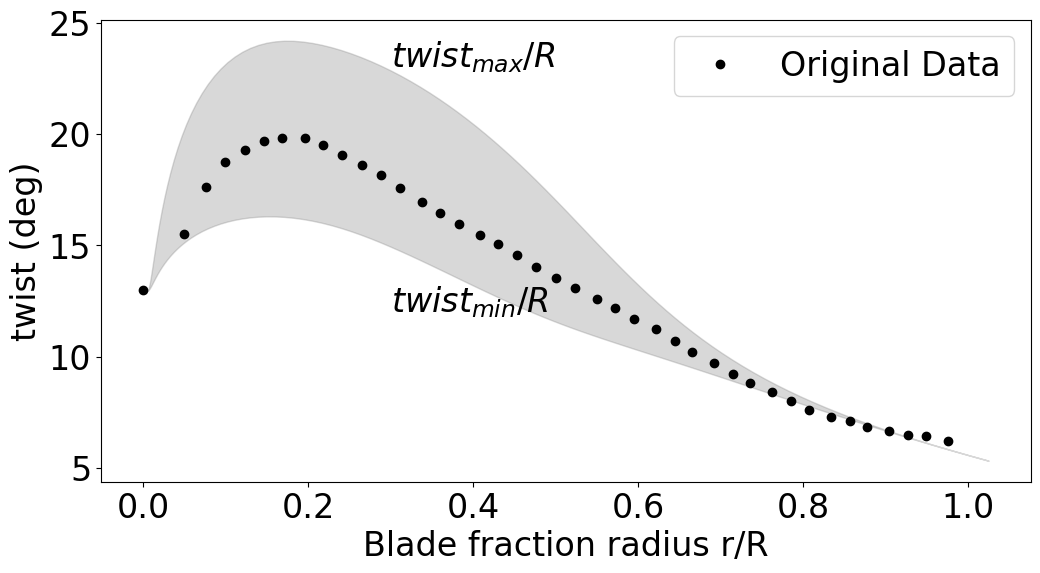

In [13]:

# 提取x和y坐标
x = pitch_df['r/R']
y = pitch_df['twist (deg)']

# 使用splprep进行五阶B样条拟合
tck, u = splprep([x, y], k=4, s=2)  # s=0表示完全拟合，没有平滑

# 获取控制点
tck1 = tck.copy()
control_points  = tck1[1] 
control_points[1][2] = control_points[1][2] - 3
control_points[1][3] = control_points[1][3] - 3
control_points[1][4] = control_points[1][4] - 3

# 为了展示拟合效果，使用splev生成B样条曲线的点
x_low, y_low = splev(np.linspace(0, 1,100), tck1)

# 获取控制点
tck2 = tck.copy()
control_points  = tck2[1] 
control_points[1][2] = control_points[1][2]+ 8
control_points[1][3] = control_points[1][3] + 8
control_points[1][4] = control_points[1][4] + 8

# 为了展示拟合效果，使用splev生成B样条曲线的点
x_up, y_up = splev(np.linspace(0, 1,100), tck2)


x_label = 'Blade fraction radius r/R'
y_label = 'twist (deg)'
title   = 'distribution of the relative chord'
s1 = '$twist_{min} / R$'
s2 = '$twist_{max} / R$'
# 绘制原始数据点和拟合的B样条曲线
plt.figure(figsize=(12, 6))
plt.plot(x[:-1], y[:-1], 'o', c= 'black', label='Original Data')
plt.fill_between(x_low, y_low, y_up, color='gray', alpha=0.3)

plt.legend()
plt.text(0.3,12, s = s1, fontdict={'size': 24, 'color': 'black'})
plt.text(0.3,23, s = s2, fontdict={'size': 24, 'color': 'black'})
plt.xlabel(x_label, fontdict={'size': 24, 'color': 'black'})
plt.ylabel(y_label, fontdict={'size': 24, 'color': 'black'})
# plt.show()
plt.savefig('DualTransfer_Twistdistribution.pdf')